# Spotify Final Project Report

Anushka Nayak, Kate Ma, Nathan Ou, Michelle Sun, Abeni Liu

**Dataset**


---


Our dataset contains Spotify tracks over 125 genres. Each track has some identification features such as track id, track name, artist who performed the track, and audio features such as danceability, energy, loudness, and valence, for a total of 21 features. There are 114,000 samples in the data, and it is tabular and was cleaned ahead of time.

The feature that we focused on for our data analysis is popularity, which is a value between 0 and 100, with 100 being most popular. It was calculate using an algorithm based on the total number of plays the track has had and how recent those plays are. As a result, more recent songs that are played more now have higher popularity than songs played a lot in the past, which is an implication that made predicting popularity from audio features in the dataset more difficult.

**Problem Addressed**


---

Our project’s objective is to predict popularity with selected features of the dataset. We used forward feature selection to find features that were most strongly associated with popularity and applied various techniques for prediction including linear and logistic regression, PCA and clustering, random forests, and neural networks. Out of these methods, our key methodology that worked was random forests.

In [1]:
!pip install datasets
%pip install scikit-lego

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.6/219.6 kB 5.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Our chosen dataset contains Spotify tracks over a range of 125 different genres which lists audio features of each track. There are 114, 000 rows and 21 columns.

In [3]:
from datasets import load_dataset

# load in CSV data file
ds = load_dataset("maharshipandya/spotify-tracks-dataset", split="train")

# Convert the 'train' dataset to a pandas DataFrame
spotify_df = pd.DataFrame(ds)

# Remove the rows with missing values, since there is only one row our of 114K rows, we decided it is insignificant
spotify_clean = spotify_df.dropna()

# Drop duplicates while keeping the first occurrence
spotify_cleaned = spotify_clean.drop_duplicates(subset='track_id', keep='first')

# all NUMERIC the features
numeric_features = [
    'duration_ms',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

X = spotify_clean[numeric_features]
y = spotify_clean['popularity']  # Response variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.68k [00:00<?, ?B/s]

dataset.csv:   0%|          | 0.00/20.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/114000 [00:00<?, ? examples/s]

# Classification: Random Forest Algorithm and ROC

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Define features matrix and target matrix from cleaned dataset
X = spotify_clean.drop(columns=['track_id', 'artists', 'album_name','track_name', 'track_genre', 'popularity'])
y = spotify_clean['popularity']

# Turn target variable (popularity) into a binary variable to simplify model predictions
# Cut off of 35 used because that is the median of the popularty feature, reducing any potential unbalances in classification
y = (y >= 35).astype(int)

# Split data into training and testing sets, using an 80/20 split
X_train_popularity, X_test_popularity, y_train_popularity, y_test_popularity = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a Random Forest Classifier model and fit the model on the training dataset
rf = RandomForestClassifier(random_state=8743)
rf.fit(X_train_popularity,
       y_train_popularity)

# compute validation set predictions (probability)
rf_val_pred = rf.predict_proba(X_test_popularity)

# extract just the positive class prediction from rf_val_pred for later ROC and further analysis
rf_val_pred = rf_val_pred[:, 1]

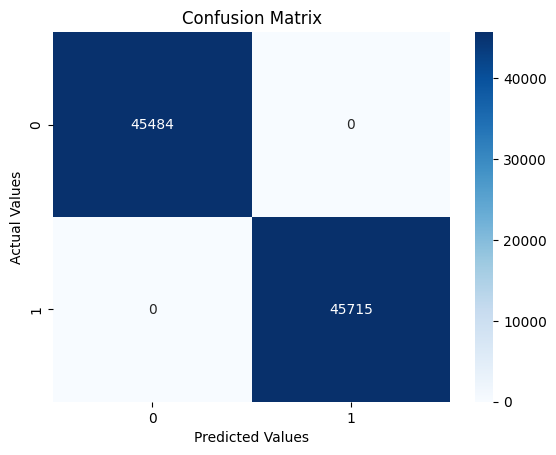

Accuracy: 1.0
Error Rate: 0.0
True Positive Rate (Sensitivity): 1.0
True Negative Rate (Specificity): 1.0
F1 Score: 1.0


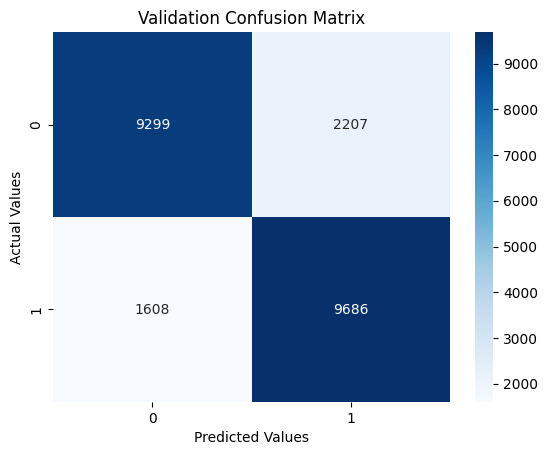

Validation Accuracy: 0.8326754385964912
Validation Error Rate: 0.16732456140350882
Validation True Positive Rate (Sensitivity): 0.8576235169116345
Validation True Negative Rate (Specificity): 0.8081870328524248
Validation F1 Score: 0.8354681502566093


In [5]:
# Calculate the Confusion Matrixx, prediction accuracy, prediction error, true positive rate, and true negative rate, and F1 score on training data set
# to analyze how tight the training process is
cm = confusion_matrix(y_train_popularity, rf.predict(X_train_popularity))
accuracy = accuracy_score(y_train_popularity, rf.predict(X_train_popularity))
error = 1 - accuracy
TPR = cm[1, 1] / (cm[1, 0] + cm[1, 1])
TNR = cm[0, 0] / (cm[0, 0] + cm[0, 1])
f1 = f1_score(y_train_popularity, rf.predict(X_train_popularity))

# Heatmap for Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

# Display results
print("Accuracy:", accuracy)
print("Error Rate:", error)
print("True Positive Rate (Sensitivity):", TPR)
print("True Negative Rate (Specificity):", TNR)
print("F1 Score:", f1)


# Calculate the Confusion Matrix, prediction accuracy, prediction error, true positive rate, and true negative rate, and F1 score on validation data set
# to analyze how well the model generalizes to new data
cm_val = confusion_matrix(y_test_popularity, rf.predict(X_test_popularity))
accuracy_val = accuracy_score(y_test_popularity, rf.predict(X_test_popularity))
error_val = 1 - accuracy_val
TPR_val = cm_val[1, 1] / (cm_val[1, 0] + cm_val[1, 1]) if (cm_val[1, 0] + cm_val[1, 1]) > 0 else 0
TNR_val = cm_val[0, 0] / (cm_val[0, 0] + cm_val[0, 1]) if (cm_val[0, 0] + cm_val[0, 1]) > 0 else 0
f1_val = f1_score(y_test_popularity, rf.predict(X_test_popularity))

# Heatmap for Validation Confusion Matrix
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

# Display results for validation set
print("Validation Accuracy:", accuracy_val)
print("Validation Error Rate:", error_val)
print("Validation True Positive Rate (Sensitivity):", TPR_val)
print("Validation True Negative Rate (Specificity):", TNR_val)
print("Validation F1 Score:", f1_val)

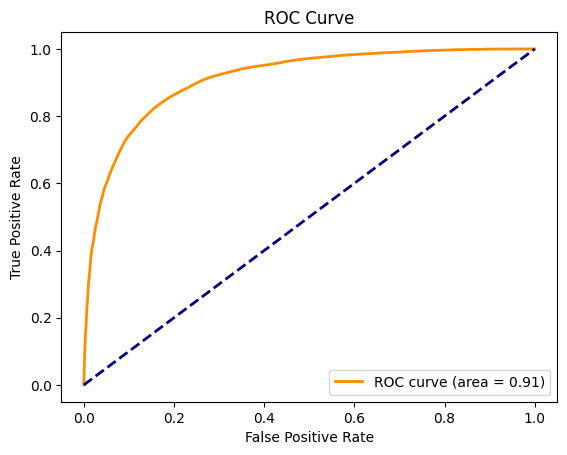

In [6]:
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score

# Calculate and plot the ROC curve and AUC on your validation data set
fpr, tpr, thresholds = roc_curve(y_test_popularity, rf_val_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [7]:
# Use 5-fold cross-validation on the validation set to calculate the AUC and accuracy of each fold.
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
tprs = []
aucs = []
accuracy_scores = []

mean_fpr = np.linspace(0, 1, 100)

# Iterate over the splits
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #train logistic regression model
    rf = RandomForestClassifier(random_state=8743)
    rf.fit(X_train, y_train)
    #predict probabilities
    y_test_pred_proba = rf.predict_proba(X_test)[:, 1]
    #calculate ROC curve and AUC values
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    aucs

    # Calculate and print accuracy for this fold
    y_test_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_scores.append(accuracy)
    print(f"Fold {i + 1} Accuracy: {accuracy}")

# Print the AUC values for each fold, together with the mean AUC
print("AUC per Fold:", aucs)
print("Mean Acurracy:", np.mean(accuracy_scores))
print("Mean AUC:", np.mean(aucs))

Fold 1 Accuracy: 0.8312280701754386
Fold 2 Accuracy: 0.8307894736842105
Fold 3 Accuracy: 0.8342105263157895
Fold 4 Accuracy: 0.828421052631579
Fold 5 Accuracy: 0.8321417606035353
AUC per Fold: [0.9100484967697291, 0.9093450572282258, 0.9094404904413814, 0.9098238853439177, 0.9132793952882816]
Mean Acurracy: 0.8313581766821105
Mean AUC: 0.9103874650143071


**Final Report Notes for Random Forest Model:**


---



To address the challenge of predicting the popularity of tracks in the Spotify dataset, we employed the Random Forest Classifier, a robust ensemble learning method. This approach was selected due to the model's ability to handle complex, non-linear relationships as well as its effectiveness in classification tasks, especially when dealing with a mixture of numerical and categorical features like we had in our dataset.

In particular, random forest models employ an ensemble strategy where the model combines multiple decision trees derived from bootstrapped datasets. This inherently reduces the risk of overfitting that individual trees might exhibit, allowing the ensemble approach to enhance the model's generalization capabilities for our goal. Popularity in music can be influenced by various intertwined factors such as genre, release date, artist popularity, and more. Random Forest can capture these interactions effectively without explicit feature engineering.

This is especially noteable for our goal, as the music data contained a good amount of non-linear features, with possible noise mixed in too. Random Forest's inherent feature selection mechanism helps in mitigating the impact of such noise, focusing on the most predictive features.

**Why Random Forest Was Chosen (Results):**


---




It delivered high accuracy and AUC scores, outperforming simpler models and other non-linear models like neural networks. It also effectively handled various feature types and captured complex patterns in the data, demonstrating resilience against overfitting and noise within the dataset.

On the Validation dataset, the following metrics were scored:

* Validation Accuracy: 0.8326754385964912
* Validation Error Rate: 0.16732456140350882
* Validation True Positive Rate (Sensitivity): 0.8576235169116345
* Validation True Negative Rate (Specificity): 0.8081870328524248
* Validation F1 Score: 0.8354681502566093
* AUROC: 0.91

After computing 5-fold cross validation, these were the results:
* Fold 1 Accuracy: 0.8312280701754386
* Fold 2 Accuracy: 0.8307894736842105
* Fold 3 Accuracy: 0.8342105263157895
* Fold 4 Accuracy: 0.828421052631579
* Fold 5 Accuracy: 0.8321417606035353
* AUC per Fold: [0.9100484967697291, 0.9093450572282258, 0.9094404904413814, 0.9098238853439177, 0.9132793952882816]

This can be summarized as:
* Mean Accuracy: 0.8313581766821105
* Mean AUROC: 0.9103874650143071

This cross-validated model produced high mean accuracy and AUROC values that were better than our other models, indicating good performance and generalization to new data. Of course, if our model did not perform well in cross-validation, then defining certain hyperparameters (max_depth, min_samples_split, max_leaf_nodes, etc.) would have been needed to prevent overfitting. However, as mentioned previously, because of the ensemble nature of the Random Forest Models that inherently prevent overfitting, we could derive extremely good model performance using sklearn's default parameters. This simple elegance together with the fact that it had the best performance across all models used, led us to choose the Random Forest Model.



**Some limitations to the model include the following:**
* Limited Interpretability: While Random Forests provide feature importance scores, their ensemble nature makes it difficult to interpret individual decision paths, hindering comprehensive understanding of how predictions are made.
* High Computational Demand: Training multiple decision trees requires significant computational resources and time, especially with large datasets, which can be a constraint in resource-limited environments.
* Handling Imbalanced Data: Despite binarizing the target variable, Random Forests can still exhibit bias towards the majority class, potentially leading to poor performance on the minority class without proper adjustments, which requires prior knowledge or hyperparameter selection.
* Dependence on Feature Engineering: The model’s effectiveness heavily relies on the quality and relevance of input features. Irrelevant or noisy features can degrade performance, necessitating meticulous feature selection and engineering.
* Risk of Overfitting: Although ensemble methods reduce overfitting risks, excessive tree depth or an excessive number of trees can still cause the model to overfit the training data, compromising its generalization to unseen data.



**How to use the code:**

---



1. Starting with the necessary libraries, begin by importing all the required Python packages. These libraries are fundamental for data manipulation, model building, evaluation, and visualization. Specifically, pandas and numpy are used for data handling, scikit-learn for building and evaluating the machine learning model, and seaborn along with matplotlib for creating insightful visualizations. Before starting to write the model, make sure that these libraries are installed in your Python environment.

2. Once the environment is set up, proceed by loading and preparing the dataset. In our code above, we first cleaned the Spotify dataset and stored it in a DataFrame named spotify_cleaned to use for this model. Define your feature matrix X by dropping non-predictive/non-numeric columns such as 'track_id', 'artists', 'album_name', 'track_name', 'track_genre', and the target variable 'popularity'. The target variable y is extracted as the 'popularity' column from this DataFrame. This focuses the model on the relevant features that contribute to predicting popularity.

3. To simplify the prediction task and address potential class imbalance, binarize the target variable. Convert the continuous popularity scores into a binary classification problem by setting a cutoff at 35, which is the median value of the popularity feature in this context. This transformation categorizes tracks as either popular (1) or not popular (0), facilitating a more balanced classification scenario.

4. With the data prepared, the next step is to split the dataset into training and testing sets. Use an 80/20 split to allocate 80% of the data for training the model and 20% for testing its performance on unseen data. The train_test_split function from scikit-learn ensures that the split is random yet reproducible by setting a random_state.

5. Initializing and training the Random Forest Classifier is the core of this model implementation. The RandomForestClassifier from scikit-learn is instantiated with a fixed random_state to ensure reproducibility of results. The model is then trained using the training data (X_train_popularity and y_train_popularity).

6. After training, make predictions on the validation set to evaluate the model's performance. Use the predict_proba method to obtain the probability estimates for each class. For further analysis, especially for plotting the ROC curve, extract the probabilities corresponding to the positive class (1) as a separate variable.

7. Evaluating the model's performance on the training data provides insights into how well the model has learned the underlying patterns. Calculate various metrics such as the confusion matrix, accuracy, error rate, True Positive Rate (TPR), True Negative Rate (TNR), and F1 score. Visualize the confusion matrix using a heatmap for an intuitive understanding of the model's predictions versus actual values.

8. Similarly, assess the model's performance on the validation (test) data to determine its generalization capabilities. Compute the same set of metrics and visualize the confusion matrix for the test set. This comparison between training and validation performance helps identify any potential overfitting or underfitting issues.

9. To further evaluate the model's discriminatory ability, plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC). The ROC curve visualizes the trade-off between the true positive rate and false positive rate at various threshold settings, while the AUC provides a single scalar value to summarize the model's performance.

10. To ensure that the model's performance is robust and not reliant on a specific train-test split, implement 5-fold cross-validation. This technique involves partitioning the dataset into five subsets (folds), training the model on four folds, and validating it on the remaining fold. This process is repeated five times, with each fold serving as the validation set once. Stratified cross-validation maintains the class distribution across folds, providing a more reliable assessment of the model's performance.

11. After running the cross-validation, review the results to understand the model's consistency across different data splits. High and consistent AUC and accuracy scores across all folds indicate a robust and reliable model. Any significant variation might suggest that the model's performance is sensitive to the specific data it was trained on, indicating potential areas for improvement such as feature selection or hyperparameter tuning.